In [1]:
import numpy as np
import pandas as pd
from lxml import etree as et
import os.path, glob
import sqlite3
from sys import getsizeof
import tempfile
from datetime import datetime
import calendar

In [2]:
names = {
    'badges' : ['UserId', 'Name', 'Date'],
    'comments' : ['Id', 'PostId', 'Score', 'Text', 'CreationDate', 'UserId'],
    'posts' : ['Id', 'PostTypeId', 'ParentID', 'AcceptedAnswerId', 'CreationDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
               'LastEditorUserId', 'LastEditorDisplayName', 'LastEditDate', 'LastActivityDate', 'CommunityOwnedDate', 'ClosedDate',
               'Title', 'Tags', 'AnswerCount', 'CommentCount', 'FavoriteCount'],
    'posthistory' : ['Id', 'PostHistoryTypeId', 'PostId', 'RevisionGUID', 'CreationDate', 'UserId', 'UserDisplayName', 
                     'Comment', 'Text', 'CloseReasonId'],
    'postlinks' : ['Id', 'CreationDate', 'PostId', 'RelatedPostId', 'PostLinkTypeId'],
    'users' : ['Id', 'Reputation', 'CreationDate', 'DisplayName', 'EmailHash', 'LastAccessDate', 'WebsiteUrl',
               'Location', 'Age', 'AboutMe', 'Views', 'UpVotes', 'DownVotes'],
    'votes' : ['PostId', 'VoteTypeId', 'CreationDate', 'UserId', 'BountyAmount'], 
    'tags' : ['Id', 'TagName', 'Count', 'ExcerptPostId', 'WikiPostId']}

In [3]:
conn = sqlite3.connect('pd3_py275688873.db')

In [4]:
for stack in glob.glob("*.com"):
    stack_name = stack[:stack.find('.')]
    for xml in glob.glob(os.path.join(stack, "*.xml")):
        xml_name = xml[xml.find('.com') + 5:xml.find('.xml')].lower()
        col_names = names.get(xml_name)
        tree = et.parse(xml)
        root = tree.getroot()
        df = pd.DataFrame([[r.get(i) for i in col_names] for r in root], columns = col_names)
        #for c in df.columns:
        #   print(stack_name + ' ' + xml_name)
        #   df[c].astype(float, errors = 'ignore', copy = False)
        df.to_sql(stack_name[0] + '_' + xml_name, conn, index = False)  
        if stack_name == 'ell':
            if xml_name == 'badges':
                e_badges = df
            elif xml_name == 'comments':
                e_comments = df
            elif xml_name == 'posts':
                e_posts = df
            elif xml_name == 'posthistory':
                e_posthistory = df
            elif xml_name == 'postlinks':
                e_postslinks = df
            elif xml_name == 'users':
                e_users = df
            elif xml_name == 'votes':
                e_votes = df
            elif xml_name == 'tags':
                e_tags = df
        elif stack_name == 'movies':
            if xml_name == 'badges':
                m_badges = df
            elif xml_name == 'comments':
                m_comments = df
            elif xml_name == 'posts':
                m_posts = df
            elif xml_name == 'posthistory':
                m_posthistory = df
            elif xml_name == 'postlinks':
                m_postslinks = df
            elif xml_name == 'users':
                m_users = df
            elif xml_name == 'votes':
                m_votes = df
            elif xml_name == 'tags':
                m_tags = df      
        elif stack_name == 'politics':
            if xml_name == 'badges':
                p_badges = df
            elif xml_name == 'comments':
                p_comments = df
            elif xml_name == 'posts':
                p_posts = df
            elif xml_name == 'posthistory':
                p_posthistory = df
            elif xml_name == 'postlinks':
                p_postslinks = df
            elif xml_name == 'users':
                p_users = df
            elif xml_name == 'votes':
                p_votes = df
            elif xml_name == 'tags':
                p_tags = df
        

In [5]:
        for c in df.columns:
            df[c] = df[c].astype(float, errors = 'ignore')
            df[c] = df[c].astype(int, errors = 'ignore')
            if c.lower().find('date') > 0:
                df[c] = pd.to_datetime(df[c])

In [6]:
p_users.head()

,Id,Reputation,CreationDate,DisplayName,EmailHash,LastAccessDate,WebsiteUrl,Location,Age,AboutMe,Views,UpVotes,DownVotes
0,-1,1,2012-12-04T20:12:17.363,Community,None,2012-12-04T20:12:17.363,None,on the server farm,None,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",23,2,15
1,1,101,2012-12-04T20:30:56.000,Geoff Dalgas,None,2013-03-26T05:16:50.490,http://stackoverflow.com,"Corvallis, OR",None,<p>Developer on the Stack Overflow team. Find...,3,0,0
2,2,100,2012-12-04T20:34:24.000,Adam Lear,None,2017-06-19T19:39:56.960,None,"New York, NY",None,\n\n<p>Developer at Stack Overflow. Canadian w...,12,7,0
3,3,101,2012-12-04T20:34:26.000,Jaydles,None,2013-08-30T15:51:06.383,https://blog.stackexchange.com/authors/jhanlon/,"New York, NY, United States",None,<p>I am: </p>\n\n<ul>\n<li>EVP of Culture and...,0,1,0
4,5,304,2012-12-04T20:36:06.000,Robert Cartaino,None,2018-04-04T13:30:53.130,None,"Palm Bay, FL",None,"<p><a href=""http://blog.stackoverflow.com/2010...",24,15,8


In [7]:
p_badges.head(2)

,UserId,Name,Date
0,1,Autobiographer,2012-12-04T21:34:12.180
1,10,Autobiographer,2012-12-04T21:34:12.180


In [178]:
p_comments.sort_values(by="Score", ascending=False).head(10)

,Id,PostId,Score,Text,CreationDate,UserId
105,109,80,9,"Past affiliations don't matter, from the momen...",2012-12-10T03:35:53.837,101
3203,7952,3507,9,"@guest271314 I'm sorry, but this is all the he...",2018-07-22T17:01:40.003,3135
2000,5439,2992,9,Your post didn't have to be deleted. Philipp ...,2017-06-01T17:11:20.073,193
3628,8589,3641,9,I would change the name of both. Experience te...,2018-09-17T13:35:05.517,11249
2010,5453,3005,9,"This Meta post is posted as a question, but it...",2017-06-03T03:01:07.247,2984
3527,8412,3598,9,It is now at a level where white supremacist r...,2018-08-30T15:12:07.320,8062
3454,8289,3583,9,"@MathematicsStudent1122 Racism is not a ""polit...",2018-08-24T21:58:46.143,101
3227,7981,3507,9,@guest271314 Of course there is the possibilit...,2018-07-23T13:46:49.417,11249
3614,8575,3632,8,This is indeed a superior solution as it avoid...,2018-09-14T20:31:15.790,18373
3231,7986,3509,8,I see no evidence that the algorithm is broken...,2018-07-23T16:11:55.670,11249


In [187]:
p_posts.sort_values(by="ViewCount", ascending=False).loc[:,["ViewCount","Body"]]

,ViewCount,Body
813,99,"<p>Take a look at this question: <a href=""http..."
1597,98,<p>Can anyone think of a way to ask for reason...
976,97,<p>I've recently requested this question – <a ...
1518,96,<p>Many question about the US government can a...
1198,96,<p>What can I do about an answer that is accep...
1151,96,<p>Some users ask (main) part of question in t...
1143,96,"<p>In response to this question, <a href=""http..."
164,96,"<p>After reaching public beta, I see more and ..."
1575,96,"<p>The question originally called <a href=""htt..."
916,96,"<p>Over on RPG.SE, we are using a post notice ..."


In [10]:
p_posthistory.head(2)

,Id,PostHistoryTypeId,PostId,RevisionGUID,CreationDate,UserId,UserDisplayName,Comment,Text,CloseReasonId
0,1,2,1,a64f186c-5925-4801-9b94-4f278ae96df3,2012-12-04T21:57:33.980,20,None,None,Some questions on this site are likely to be s...,None
1,2,1,1,a64f186c-5925-4801-9b94-4f278ae96df3,2012-12-04T21:57:33.980,20,None,None,How should we tag country-specific questions?,None


In [11]:
p_postslinks.head(2)

,Id,CreationDate,PostId,RelatedPostId,PostLinkTypeId
0,18,2012-12-04T23:06:56.450,7,14,None
1,82,2012-12-05T10:21:19.943,40,3,None


In [12]:
p_users.head(2)

,Id,Reputation,CreationDate,DisplayName,EmailHash,LastAccessDate,WebsiteUrl,Location,Age,AboutMe,Views,UpVotes,DownVotes
0,-1,1,2012-12-04T20:12:17.363,Community,None,2012-12-04T20:12:17.363,None,on the server farm,None,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",23,2,15
1,1,101,2012-12-04T20:30:56.000,Geoff Dalgas,None,2013-03-26T05:16:50.490,http://stackoverflow.com,"Corvallis, OR",None,<p>Developer on the Stack Overflow team. Find...,3,0,0


In [13]:
p_votes.head(2)

,PostId,VoteTypeId,CreationDate,UserId,BountyAmount
0,1,2,2012-12-04,NaN,NaN
1,1,2,2012-12-04,NaN,NaN


In [14]:
p_tags.head(2)

,Id,TagName,Count,ExcerptPostId,WikiPostId
0,1,bug,14,None,None
1,2,feature-request,30,None,None


In [15]:
p_tags.iloc[:,1].describe()

count            86
unique           86
top       etiquette
freq              1
Name: TagName, dtype: object

In [16]:
e_users.head(2)

,Id,Reputation,CreationDate,DisplayName,EmailHash,LastAccessDate,WebsiteUrl,Location,Age,AboutMe,Views,UpVotes,DownVotes
0,-1,1,2013-01-23T19:59:06.150,Community,None,2013-01-23T19:59:06.150,http://meta.stackexchange.com/,on the server farm,None,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",0,10590,10305
1,1,101,2013-01-23T20:13:47.453,Geoff Dalgas,None,2014-09-22T17:44:09.233,http://stackoverflow.com,"Corvallis, OR",None,<p>Developer on the Stack Overflow team. Find...,3127,0,0


In [17]:
p_users.head(2)

,Id,Reputation,CreationDate,DisplayName,EmailHash,LastAccessDate,WebsiteUrl,Location,Age,AboutMe,Views,UpVotes,DownVotes
0,-1,1,2012-12-04T20:12:17.363,Community,None,2012-12-04T20:12:17.363,None,on the server farm,None,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",23,2,15
1,1,101,2012-12-04T20:30:56.000,Geoff Dalgas,None,2013-03-26T05:16:50.490,http://stackoverflow.com,"Corvallis, OR",None,<p>Developer on the Stack Overflow team. Find...,3,0,0


In [18]:
pd.merge(p_users, e_users, right_on=["DisplayName","Location", "AboutMe"], left_on=["DisplayName","Location", "AboutMe"]).loc[:,["DisplayName","Id_x","Id_y"]].head()

,DisplayName,Id_x,Id_y
0,Community,-1,-1
1,Geoff Dalgas,1,1
2,Adam Lear,2,16
3,Jaydles,3,17
4,Robert Cartaino,5,48


In [19]:
e_users.iloc[:,7][1].rfind(" ")

10

In [20]:
USAstates = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "USA", "US", "NYC", "NY", "New York", "USA", "United States", "United States of America",
            "Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

adres = "https://en.wikipedia.org/wiki/United_States"
res = pd.read_html(adres)
USAcities=list(res[2].iloc[2:21,1])
USAcities[5]='Washington'
USA=USAstates+USAcities


In [21]:
adres = "https://en.wikipedia.org/wiki/Europe"
res = pd.read_html(adres)
europe=res[2].loc[1:50,[2,6,7]]
europe.columns=["English", "Capital", "Native"]
europe.iloc[48,2]="GB/UK/United Kingdom/England/Scotland/Ireland/Wales"
europe["English"]=[p[0:p.find("[")-1] if p.find("[")!=-1 else p for p in europe.loc[:,"English"]]

In [22]:
adres = "https://en.wikipedia.org/wiki/Asia"
res = pd.read_html(adres)
asia=res[5].loc[:,[2,5]].loc[1:,:]
asia.columns=["country","city"]
asia["country"]=[p[0:p.find("[")] if p.find("[")!=-1 else p for p in asia.loc[:,"country"]]
asia.iloc[8,0]="China"
asia.iloc[43,0]="Taiwan"

In [23]:
country=[p[p.rfind(",")+1:].lstrip().rstrip() if type(p)==str else p for p in e_users.iloc[:,7]]
e_users["country"]=country
e_users.groupby("country").size().sort_values(ascending = False).head(18)

country
India             3142
United States     1693
United Kingdom     982
Germany            737
Russia             637
USA                599
Canada             540
Brazil             499
France             485
China              430
Australia          428
Iran               398
Ukraine            315
CA                 288
UK                 284
Italy              267
Poland             254
Pakistan           247
dtype: int64

In [24]:

#to bedzie mozna jakos lepiej zrobic
country2=[0]*len(country)
for i in range(len(country)):
    if country[i] == None:
        country2[i]= None
    elif (country[i] in USA) or (sum([p in country[i] for p in USA])>0):
        country2[i]='USA'
    else:
        test=list()
        test2=list()
        test3_asia=list()
        test4_asia=list()
        for j in range(europe.shape[0]):
            test.append((country[i] in europe.iloc[j,1])+(country[i] in europe.iloc[j,2]))
            test2.append((europe.iloc[j,1] in country[i])+sum([(p in country[i]) for p in europe.iloc[j,2].replace("("," ").replace(")","").replace("/"," ").split()if p!='i'])+ (europe.iloc[j,0] in country[i]))
        for j in range(asia.shape[0]):
            test3_asia.append((country[i] in asia.iloc[j,0])+(country[i] in asia.iloc[j,1]))
            test4_asia.append((asia.iloc[j,0] in country[i])+sum([(p in country[i]) for p in asia.iloc[j,1].replace("("," ").replace(")","").replace("/"," ").split()if p!='i']))
        if sum(test)==0 and sum(test2)==0 and sum(test3_asia)==0 and sum(test4_asia)==0:
            country2[i]=country[i]
        else:
            if sum(test)>0:
                country2[i]=europe.iloc[test.index(max(test)),0]
            elif sum(test2)>0:
                country2[i]=europe.iloc[test2.index(max(test2)),0]
            elif sum(test3_asia)>0:
                country2[i]=asia.iloc[test3_asia.index(max(test3_asia)),0]
            elif sum(test4_asia)>0:
                country2[i]=asia.iloc[test4_asia.index(max(test4_asia)),0]

In [25]:
e_users["country"]=country2
e_users.groupby("country").size().sort_values(ascending = False).head(50)

country
USA               4608
India             3342
United Kingdom    1474
Germany            855
Russia             754
Canada             540
France             509
Brazil             499
China              471
Australia          428
Iran               426
Ukraine            333
Italy              332
Poland             323
Netherlands        313
Spain              292
Turkey             291
Pakistan           250
Bangladesh         234
Japan              230
Brasil             203
Vietnam            183
Switzerland        160
Indonesia          157
Egypt              153
Sweden             153
Belgium            143
Czech Republic     131
Sri Lanka          129
Israel             126
South Korea        116
Ireland            116
Argentina          112
Romania            105
Taiwan             104
Earth              102
Singapore           99
Mexico              99
Hungary             97
Denmark             95
Philippines         94
Malaysia            86
Austria             85
Tha

In [26]:
country=[p[p.rfind(",")+1:].lstrip().rstrip() if p!=None else p for p in p_users.iloc[:,7]]
p_users["country"]=country
p_users.groupby("country").size().sort_values(ascending = False).head(18)    

country
United States     197
United Kingdom     95
Germany            56
USA                54
Canada             39
India              38
Australia          37
UK                 29
Netherlands        27
France             20
CA                 19
California         18
Poland             16
TX                 16
Russia             15
NY                 14
Italy              12
WA                 12
dtype: int64

In [27]:

#to bedzie mozna jakos lepiej zrobic
country2=[0]*len(country)
for i in range(len(country)):
    if country[i] == None:
        country2[i]= None
    elif (country[i] in USA) or (sum([p in country[i] for p in USA])>0):
        country2[i]='USA'
    else:
        test=list()
        test2=list()
        test3_asia=list()
        test4_asia=list()
        for j in range(europe.shape[0]):
            test.append((country[i] in europe.iloc[j,1])+(country[i] in europe.iloc[j,2]))
            test2.append((europe.iloc[j,1] in country[i])+sum([(p in country[i]) for p in europe.iloc[j,2].replace("("," ").replace(")","").replace("/"," ").split()if p!='i'])+ (europe.iloc[j,0] in country[i]))
        for j in range(asia.shape[0]):
            test3_asia.append((country[i] in asia.iloc[j,0])+(country[i] in asia.iloc[j,1]))
            test4_asia.append((asia.iloc[j,0] in country[i])+sum([(p in country[i]) for p in asia.iloc[j,1].replace("("," ").replace(")","").replace("/"," ").split()if p!='i']))
        if sum(test)==0 and sum(test2)==0 and sum(test3_asia)==0 and sum(test4_asia)==0:
            country2[i]=country[i]
        else:
            if sum(test)>0:
                country2[i]=europe.iloc[test.index(max(test)),0]
            elif sum(test2)>0:
                country2[i]=europe.iloc[test2.index(max(test2)),0]
            elif sum(test3_asia)>0:
                country2[i]=asia.iloc[test3_asia.index(max(test3_asia)),0]
            elif sum(test4_asia)>0:
                country2[i]=asia.iloc[test4_asia.index(max(test4_asia)),0]

In [28]:
p_users["country"]=country2
p_users.groupby("country").size().sort_values(ascending = False).head(28)  

country
USA               506
United Kingdom    138
Germany            64
India              50
Canada             39
Australia          37
Netherlands        33
France             21
Russia             18
Poland             16
Italy              14
Sweden             12
Earth              10
Finland             9
Europe              9
Switzerland         9
Brazil              8
Japan               8
Czech Republic      8
Iran                8
Spain               8
Turkey              7
Israel              7
Denmark             6
Norway              6
Ukraine             6
Romania             6
Belgium             6
dtype: int64

In [29]:
country=[p[p.rfind(",")+1:].lstrip().rstrip() if p!=None else p for p in m_users.iloc[:,7]]
m_users["country"]=country
m_users.groupby("country").size().sort_values(ascending = False).head(18)    

country
United States     336
India             330
United Kingdom    232
Germany           128
Canada            100
USA                92
Australia          84
France             67
Netherlands        53
UK                 52
CA                 43
Italy              35
NY                 32
Belgium            32
Poland             31
Brazil             30
Russia             27
Sweden             26
dtype: int64

In [30]:
#to bedzie mozna jakos lepiej zrobic
country2=[0]*len(country)
for i in range(len(country)):
    if country[i] == None:
        country2[i]= None
    elif (country[i] in USA) or (sum([p in country[i] for p in USA])>0):
        country2[i]='USA'
    else:
        test=list()
        test2=list()
        test3_asia=list()
        test4_asia=list()
        for j in range(europe.shape[0]):
            test.append((country[i] in europe.iloc[j,1])+(country[i] in europe.iloc[j,2]))
            test2.append((europe.iloc[j,1] in country[i])+sum([(p in country[i]) for p in europe.iloc[j,2].replace("("," ").replace(")","").replace("/"," ").split()if p!='i'])+ (europe.iloc[j,0] in country[i]))
        for j in range(asia.shape[0]):
            test3_asia.append((country[i] in asia.iloc[j,0])+(country[i] in asia.iloc[j,1]))
            test4_asia.append((asia.iloc[j,0] in country[i])+sum([(p in country[i]) for p in asia.iloc[j,1].replace("("," ").replace(")","").replace("/"," ").split()if p!='i']))
        if sum(test)==0 and sum(test2)==0 and sum(test3_asia)==0 and sum(test4_asia)==0:
            country2[i]=country[i]
        else:
            if sum(test)>0:
                country2[i]=europe.iloc[test.index(max(test)),0]
            elif sum(test2)>0:
                country2[i]=europe.iloc[test2.index(max(test2)),0]
            elif sum(test3_asia)>0:
                country2[i]=asia.iloc[test3_asia.index(max(test3_asia)),0]
            elif sum(test4_asia)>0:
                country2[i]=asia.iloc[test4_asia.index(max(test4_asia)),0]

In [31]:
m_users["country"]=country2
m_users.groupby("country").size().sort_values(ascending = False).head(28)  

country
USA               952
India             357
United Kingdom    320
Germany           150
Canada            100
Australia          84
France             71
Netherlands        66
Belgium            39
Italy              37
Poland             34
Brazil             30
Russia             27
Sweden             27
Earth              25
Spain              24
Ireland            23
Pakistan           20
Switzerland        20
Turkey             18
Romania            18
Iran               17
Czech Republic     17
Sri Lanka          17
Norway             15
Greece             14
Hungary            14
South Africa       14
dtype: int64

In [32]:
for p in range(p_tags.shape[0]):
    p_tags.Count[p]=int(p_tags.Count[p])

In [33]:
for p in range(e_tags.shape[0]):
    e_tags.Count[p]=int(e_tags.Count[p])

# Wykresy najbardziej popularnych tagow

# ell - n najbardziej popularnych tagow wraz z licznosci awystapien

In [49]:
import plotly.plotly as py
import plotly.graph_objs as go
n=10
df=e_tags.sort_values(by="Count", ascending = False).head(n)
data = [go.Bar(
            x=df.TagName,
            y=df.Count
    )]

py.iplot(data, filename='basic-bar')

# poli - n najbardziej popularnych tagow wraz z licznosci awystapien

In [50]:
import plotly.plotly as py
import plotly.graph_objs as go
n=10
df=p_tags.sort_values(by="Count", ascending = False).head(n)
data = [go.Bar(
            x=df.TagName,
            y=df.Count
    )]

py.iplot(data, filename='basic-bar')

# movies - n najbardziej popularnych tagow wraz z licznosci awystapien

In [51]:
import plotly.plotly as py
import plotly.graph_objs as go
n=10
df=m_tags.sort_values(by="Count", ascending = False).head(n)
data = [go.Bar(
            x=df.TagName,
            y=df.Count
    )]

py.iplot(data, filename='basic-bar')

In [53]:
n_of_countries=10
n_of_tags=4
Questions = e_posts.loc[e_posts.PostTypeId=='1'].reset_index()
Questions["TagList"]=[p.replace("<","").replace(">"," ").lstrip().rstrip().split(" ") for p in Questions.Tags]

tags=list()
id=list()

for i in range(Questions.shape[0]):
    tags=tags+Questions.TagList[i]
    id=id+[Questions.Id[i]]*len(Questions.TagList[i])
    
x=pd.DataFrame(id,tags).reset_index()
x.columns=["tag","Id"]

Questions2=pd.merge(x,Questions,left_on="Id", right_on="Id")

k=pd.merge(Questions2,e_users,left_on="OwnerUserId", right_on="Id")

countries=k.groupby(by="country").size().sort_values(ascending=False).index[0:n_of_countries]
country_tag_group=k.groupby(["country","tag"]).size().unstack().reset_index()
#for p in europe.iloc[:,0]:

lista=list()
lista2=list()

for p in countries:
    pol_tag=country_tag_group.loc[country_tag_group.country.values==p].reset_index().iloc[0,1:].reset_index()
    pol_tag.columns=["tag","numb"]
    lista2.append(pol_tag)
    lista.append(pol_tag.loc[1:,].sort_values(by="numb",ascending=False).iloc[0:n_of_tags,])
    
tagi_mapa=list()

for i in range(len(countries)):
               tagi_mapa=tagi_mapa+list(lista[i].tag)
        
tagi=list(set(tagi_mapa)) #tagi, ktore pojawiaja sie powyzej

mapa=pd.DataFrame(np.r_[[0]*len(countries)*len(tagi)].reshape(len(countries),len(tagi)))
mapa.columns=tagi
mapa.index=countries

for p in range(len(countries)):
    for t in tagi:
        if np.isnan(lista2[p].loc[lista2[p].tag==t,'numb'].iloc[0])==False:
            mapa.loc[countries[p],t]=lista2[p].loc[lista2[p].tag==t,'numb'].iloc[0]

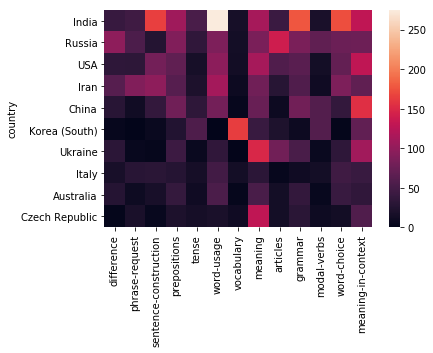

In [55]:
import seaborn as sns
ax = sns.heatmap(mapa)

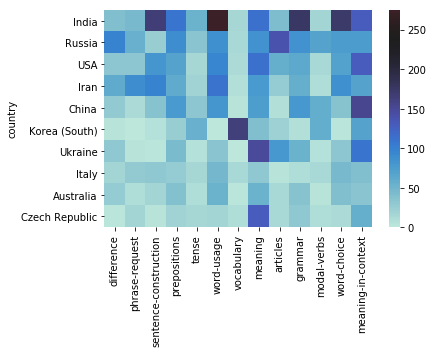

In [70]:
ax = sns.heatmap(mapa,center=240)

In [62]:
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='asiacz', api_key='Fd7M4iS81fCCLQyiiJb3')
import plotly.graph_objs as go

trace = go.Heatmap(z=np.array(mapa),
                   x=list(mapa.columns),
                   y=list(mapa.index))
data=[trace]
py.iplot(data, filename='labelled-heatmap')


# poli

In [106]:
n_of_countries=10
n_of_tags=4
Questions = p_posts.loc[e_posts.PostTypeId=='1'].reset_index()
Questions=Questions.iloc[Questions.Tags.values!=None,:]
Questions["TagList"]=[p.replace("<","").replace(">"," ").lstrip().rstrip().split(" ") for p in Questions.Tags ]

tags=list()
id=list()

for i in range(Questions.shape[0]):
    tags=tags+Questions.TagList.iloc[i]
    id=id+[Questions.Id.iloc[i]]*len(Questions.TagList.iloc[i])
    
x=pd.DataFrame(id,tags).reset_index()
x.columns=["tag","Id"]

Questions2=pd.merge(x,Questions,left_on="Id", right_on="Id")

k=pd.merge(Questions2,e_users,left_on="OwnerUserId", right_on="Id")

countries=k.groupby(by="country").size().sort_values(ascending=False).index[0:n_of_countries]
country_tag_group=k.groupby(["country","tag"]).size().unstack().reset_index()
#for p in europe.iloc[:,0]:

lista=list()
lista2=list()

for p in countries:
    pol_tag=country_tag_group.loc[country_tag_group.country.values==p].reset_index().iloc[0,1:].reset_index()
    pol_tag.columns=["tag","numb"]
    lista2.append(pol_tag)
    lista.append(pol_tag.loc[1:,].sort_values(by="numb",ascending=False).iloc[0:n_of_tags,])
    
tagi_mapa=list()

for i in range(len(countries)):
               tagi_mapa=tagi_mapa+list(lista[i].tag)
        
tagi=list(set(tagi_mapa)) #tagi, ktore pojawiaja sie powyzej

mapa=pd.DataFrame(np.r_[[0]*len(countries)*len(tagi)].reshape(len(countries),len(tagi)))
mapa.columns=tagi
mapa.index=countries

for p in range(len(countries)):
    for t in tagi:
        if np.isnan(lista2[p].loc[lista2[p].tag==t,'numb'].iloc[0])==False:
            mapa.loc[countries[p],t]=lista2[p].loc[lista2[p].tag==t,'numb'].iloc[0]

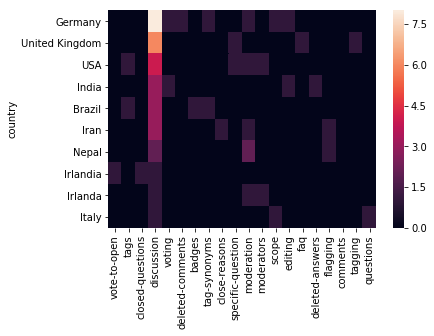

In [109]:
import seaborn as sns
ax = sns.heatmap(mapa)

import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='asiacz', api_key='Fd7M4iS81fCCLQyiiJb3')
import plotly.graph_objs as go

trace = go.Heatmap(z=np.array(mapa),
                   x=list(mapa.columns),
                   y=list(mapa.index))
data=[trace]
py.iplot(data, filename='labelled-heatmap')

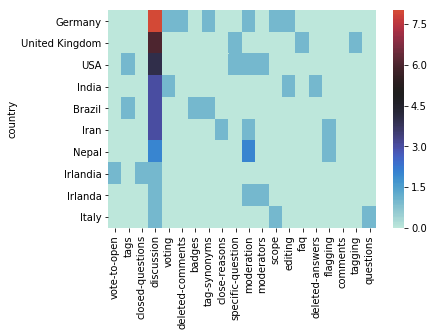

In [113]:
ax = sns.heatmap(mapa,center=5)

# movies

In [114]:
n_of_countries=10
n_of_tags=4
Questions = m_posts.loc[e_posts.PostTypeId=='1'].reset_index()
Questions=Questions.iloc[Questions.Tags.values!=None,:]
Questions["TagList"]=[p.replace("<","").replace(">"," ").lstrip().rstrip().split(" ") for p in Questions.Tags ]

tags=list()
id=list()

for i in range(Questions.shape[0]):
    tags=tags+Questions.TagList.iloc[i]
    id=id+[Questions.Id.iloc[i]]*len(Questions.TagList.iloc[i])
    
x=pd.DataFrame(id,tags).reset_index()
x.columns=["tag","Id"]

Questions2=pd.merge(x,Questions,left_on="Id", right_on="Id")

k=pd.merge(Questions2,e_users,left_on="OwnerUserId", right_on="Id")

countries=k.groupby(by="country").size().sort_values(ascending=False).index[0:n_of_countries]
country_tag_group=k.groupby(["country","tag"]).size().unstack().reset_index()
#for p in europe.iloc[:,0]:

lista=list()
lista2=list()

for p in countries:
    pol_tag=country_tag_group.loc[country_tag_group.country.values==p].reset_index().iloc[0,1:].reset_index()
    pol_tag.columns=["tag","numb"]
    lista2.append(pol_tag)
    lista.append(pol_tag.loc[1:,].sort_values(by="numb",ascending=False).iloc[0:n_of_tags,])
    
tagi_mapa=list()

for i in range(len(countries)):
               tagi_mapa=tagi_mapa+list(lista[i].tag)
        
tagi=list(set(tagi_mapa)) #tagi, ktore pojawiaja sie powyzej

mapa=pd.DataFrame(np.r_[[0]*len(countries)*len(tagi)].reshape(len(countries),len(tagi)))
mapa.columns=tagi
mapa.index=countries

for p in range(len(countries)):
    for t in tagi:
        if np.isnan(lista2[p].loc[lista2[p].tag==t,'numb'].iloc[0])==False:
            mapa.loc[countries[p],t]=lista2[p].loc[lista2[p].tag==t,'numb'].iloc[0]

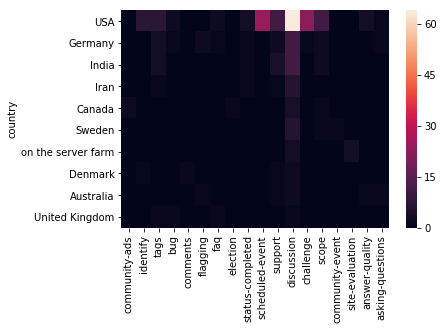

In [115]:
import seaborn as sns
ax = sns.heatmap(mapa)

import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='asiacz', api_key='Fd7M4iS81fCCLQyiiJb3')
import plotly.graph_objs as go

trace = go.Heatmap(z=np.array(mapa),
                   x=list(mapa.columns),
                   y=list(mapa.index))
data=[trace]
py.iplot(data, filename='labelled-heatmap')

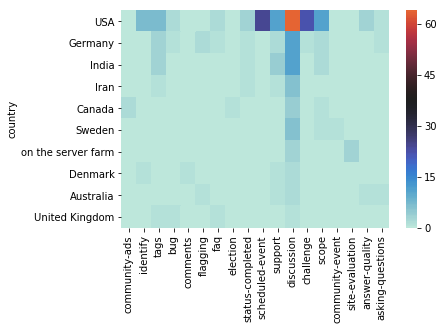

In [118]:
ax = sns.heatmap(mapa,center=38)

# wykresy licznosci postow w zaleznosci od kraju - one musza byc razem, bo pokazuja, gdzie sie uczy ang (z usa np jest duzo odp)

# ell

In [132]:
n=10
all_posts=pd.merge(e_posts, e_users, left_on="OwnerUserId", right_on="Id").groupby(by="country").size().sort_values(ascending=False).reset_index()
#liczba postow z danego kraju
q=pd.merge(e_posts.loc[e_posts.PostTypeId.values=='1'], e_users, left_on="OwnerUserId", right_on="Id").groupby(by="country").size().sort_values(ascending=False).reset_index()
#liczba pytan z danego kraju
ans=pd.merge(e_posts.loc[e_posts.PostTypeId.values=='2'], e_users, left_on="OwnerUserId", right_on="Id").groupby(by="country").size().sort_values(ascending=False).reset_index()
#liczba odpowiedzi z danego kraju
merge=pd.merge(pd.merge(all_posts, q, left_on="country", right_on="country"),ans,left_on="country", right_on="country")
merge.columns=['country','all_posts','q','ans']

In [137]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=list(merge.country[:n]),
    y=list(merge.q[:n]),
    name='Questions'
)
trace2 = go.Bar(
    x=list(merge.country[:n]),
    y=list(merge.ans[:n]),
    name='Answers'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [141]:
merge=merge.sort_values(by="q",ascending=False)
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
             x=list(merge.country[:n]),
             y=list(merge.q[:n]),
    )]

py.iplot(data, filename='basic-bar')

In [142]:
merge=merge.sort_values(by="ans",ascending=False)
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
             x=list(merge.country[:n]),
             y=list(merge.ans[:n]),
    )]

py.iplot(data, filename='basic-bar')

# Poli

In [160]:
n=10
all_posts=pd.merge(p_posts, p_users, left_on="OwnerUserId", right_on="Id").groupby(by="country").size().sort_values(ascending=False).reset_index()
all_posts=all_posts.iloc[all_posts.country.values!='on the server farm',:]
#liczba postow z danego kraju
q=pd.merge(p_posts.loc[p_posts.PostTypeId.values=='1'], p_users, left_on="OwnerUserId", right_on="Id").groupby(by="country").size().sort_values(ascending=False).reset_index()
#liczba pytan z danego kraju
ans=pd.merge(p_posts.loc[p_posts.PostTypeId.values=='2'], p_users, left_on="OwnerUserId", right_on="Id").groupby(by="country").size().sort_values(ascending=False).reset_index()
#liczba odpowiedzi z danego kraju
merge=pd.merge(pd.merge(all_posts, q, left_on="country", right_on="country"),ans,left_on="country", right_on="country")
merge.columns=['country','all_posts','q','ans']

In [161]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=list(merge.country[:n]),
    y=list(merge.q[:n]),
    name='Questions'
)
trace2 = go.Bar(
    x=list(merge.country[:n]),
    y=list(merge.ans[:n]),
    name='Answers'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [162]:
merge=merge.sort_values(by="q",ascending=False)
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
             x=list(merge.country[:n]),
             y=list(merge.q[:n]),
    )]

py.iplot(data, filename='basic-bar')

In [163]:
merge=merge.sort_values(by="ans",ascending=False)
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
             x=list(merge.country[:n]),
             y=list(merge.ans[:n]),
    )]

py.iplot(data, filename='basic-bar')

# movies

In [172]:
n=10
all_posts=pd.merge(m_posts, m_users, left_on="OwnerUserId", right_on="Id").groupby(by="country").size().sort_values(ascending=False).reset_index()
all_posts=all_posts.iloc[all_posts.country.values!='6',:]
all_posts=all_posts.iloc[all_posts.country.values!='on the server farm',:]
#liczba postow z danego kraju
q=pd.merge(m_posts.loc[m_posts.PostTypeId.values=='1'], m_users, left_on="OwnerUserId", right_on="Id").groupby(by="country").size().sort_values(ascending=False).reset_index()
#liczba pytan z danego kraju
ans=pd.merge(p_posts.loc[p_posts.PostTypeId.values=='2'], m_users, left_on="OwnerUserId", right_on="Id").groupby(by="country").size().sort_values(ascending=False).reset_index()
#liczba odpowiedzi z danego kraju
merge=pd.merge(pd.merge(all_posts, q, left_on="country", right_on="country"),ans,left_on="country", right_on="country")
merge.columns=['country','all_posts','q','ans']

In [173]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=list(merge.country[:n]),
    y=list(merge.q[:n]),
    name='Questions'
)
trace2 = go.Bar(
    x=list(merge.country[:n]),
    y=list(merge.ans[:n]),
    name='Answers'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [174]:
merge=merge.sort_values(by="q",ascending=False)
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
             x=list(merge.country[:n]),
             y=list(merge.q[:n]),
    )]

py.iplot(data, filename='basic-bar')

In [175]:
merge=merge.sort_values(by="ans",ascending=False)
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
             x=list(merge.country[:n]),
             y=list(merge.ans[:n]),
    )]

py.iplot(data, filename='basic-bar')

# Posty najczesciej odwiedzane

ell

In [190]:
e_posts.sort_values(by="ViewCount", ascending=False).loc[:,["ViewCount","Body"]].iloc[0,:]

ViewCount                                                 9993
Body         <blockquote>\n  <p>Italian people have some di...
Name: 2214, dtype: object

In [192]:
View=e_posts.sort_values(by="ViewCount", ascending=False).loc[:,["ViewCount","Body"]].iloc[0,0]
View

'9993'

In [193]:
Body=e_posts.sort_values(by="ViewCount", ascending=False).loc[:,["ViewCount","Body"]].iloc[0,1]
Body

'<blockquote>\n  <p>Italian people have some difficulties <strong>in usage</strong> of the word "interchange" and the phrase "each other".</p>\n</blockquote>\n\n<p>When I wrote that sentence some doubts arose to my mind in reference to the highlighted words "in usage".</p>\n\n<p>I excluded that it was possible to write "to use", but I don\'t know why. Afterwards I thought that I could have written "in using", but, after some thoughts, I excluded this option, too; then I decided to write "in usage", even when some uncertainty remained.</p>\n\n<p>Could anybody enlighten me on this problem? Is there some suggestion that might help incompetent speakers, as I am, in cases like this?</p>\n'

# poli

In [196]:
View=p_posts.sort_values(by="ViewCount", ascending=False).loc[:,["ViewCount","Body"]].iloc[1,0] #wzielam drugi co do liczby odwiedzin post, bo pierwszy odwolywal sie do jakiegos innego postu
View

'98'

In [198]:
Body=p_posts.sort_values(by="ViewCount", ascending=False).loc[:,["ViewCount","Body"]].iloc[1,1]
Body

'<p>Can anyone think of a way to ask for reasons why Trump should be impeached but by asking for it in a more politically correct and on topic sort of manner on SE Politics?</p>\n\n<p>If that is too broad entirely to ever work here then how could someone ask a question to get back such answers but by asking it in a different and not so blunt way where it would not be closed?</p>\n'

# movies

In [201]:
View=m_posts.sort_values(by="ViewCount", ascending=False).loc[:,["ViewCount","Body"]].iloc[0,0] #tu te posty sa jakies slabe :
View

'99'

In [206]:
Body=m_posts.sort_values(by="ViewCount", ascending=False).loc[:,["ViewCount","Body"]].iloc[3,1]
Body

'<p>Earlier I pulled up a suggested edit from a user where they edited "spelling errors". The spelling errors were actually (what I call) <em>local color</em>. What I mean by this is, in the UK, the spelling of "color" is <em>colour</em>. The spelling of "theater" is <em>theatre</em>. In my view, there is absolutely <em>nothing</em> wrong with this and should not be corrected. This is just how it\'s done and we, as editors or keepers of the SE site should not allow these types of edits to go through. I was in the process of trying to change these back, without completely rejecting the edit, due mainly because there were some other, very pertinent edits on the page. The SE system would not allow me to change them back because it said my edits were too minor. So, when I went back to reject the suggested edits, someone else had already either rejected/accepted the edits (don\'t know which) and it was no longer available to me.</p>\n\n<p>The discussion questions here are, should we be allo

In [216]:
p_posts.Id=p_posts.Id.astype(int)

In [217]:
p_votes.PostId=p_votes.PostId.astype(int)

In [229]:
p_users.Age.loc[]

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
2219    None
2220    None
2221    None
2222    None
2223    None
2224    None
2225    None
2226    None
2227    None
2228    None
2229    None
2230    None
2231    None
2232    None
2233    None
2234    None
2235    None
2236    None
2237    None
2238    None
2239    None
2240    None
2241    None
2242    None
2243    None
2244    None
2245    None
2246    None
2247    None
2248    None
Name: Age, Length: 2249, dtype: object

In [207]:
p_posts.head(1)

,Id,PostTypeId,ParentID,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,CommunityOwnedDate,ClosedDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount
0,1,1,None,2,2012-12-04T21:57:33.980,8,90,<p>Some questions on this site are likely to b...,20,None,None,None,2012-12-05T13:51:40.713,None,None,How should we tag country-specific questions?,<discussion><tags>,3,1,1


In [199]:
#popularnosc czasow
for p in tenses:
    print(p)
    print(Questions2.loc[Questions2.tag.values==p].shape[0])

NameError: name 'tenses' is not defined

In [200]:
year_all=list()
for i in e_posts.CreationDate:
    year_all.append(pd.to_datetime(i).year)
year_all=pd.DataFrame(year)

NameError: name 'year' is not defined

In [ ]:
year_all.columns=["year"]

In [ ]:
year_all_summary=year_all.groupby("year").size() #liczba postow w podziale na lata

In [ ]:
year_Q=list()
for i in e_posts.loc[e_posts.PostTypeId.values=='1'].CreationDate:
    year.append(pd.to_datetime(i).year)
year_Q=pd.DataFrame(year)
year_Q.columns=["year"]
year_Q.groupby("year").size() #liczba pytan w podziale na lata

In [ ]:
year_A=list()
for i in e_posts.loc[e_posts.PostTypeId.values=='2'].CreationDate:
    year_A.append(pd.to_datetime(i).year)
year_A=pd.DataFrame(year)
year_A.columns=["year"]
year_A.groupby("year").size() #liczba odpowiedzi w podziale na lata

In [ ]:
month=list()
year=list()
for i in e_posts.CreationDate:
    month.append(pd.to_datetime(i).month)
    year.append(pd.to_datetime(i).year)
time=pd.DataFrame(year,month).reset_index()
time.columns=["month","year"]


In [ ]:
summary=time.groupby(["year","month"]).size().unstack()

In [ ]:
sum([ True for p in e_users.AboutMe if p !=None])

In [ ]:
x=list([p.find("years") if p !=None else -2 for p in e_users.AboutMe])

In [ ]:
adres = "https://en.wikipedia.org/wiki/List_of_actors_with_Academy_Award_nominations"
res = pd.read_html(adres)

In [ ]:
actors=[p.split(" ") for p in res[1].loc[1:,0]]
surnames=[actors[i][-1].lower() for i in range(len(actors))]
counts=pd.DataFrame([sum([p in m for m in m_posts.Body]) for p in surnames],surnames).reset_index()
counts.columns=["surname", "count"]
counts.sort_values(by="count", ascending=False).head(50) #liczba wystopien nazwisk aktorow nominowanych do Oscarow w postach, ale czy na pewno nazwisk..

In [ ]:
Questions2["ViewCount"]=[int(i)for i in Questions2.ViewCount]
Questions2.groupby("tag")["ViewCount"].agg(np.sum).reset_index().sort_values(by="ViewCount", ascending=False)

In [ ]:
Questions["ViewCount"]=[int(i) for i in Questions.ViewCount]


In [ ]:


import plotly.plotly as py
plotly.tools.set_credentials_file(username='asiacz', api_key='Fd7M4iS81fCCLQyiiJb3')
import plotly.graph_objs as go

trace = go.Heatmap(=np.array(mapa),
                   x=list(mapa.columns),
                   y=list(mapa.index))
data=[trace]
py.iplot(data, filename='labelled-heatmap')



In [ ]:
Questions.sort_values(by="ViewCount", ascending=False).Body[0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
# create data
x = list([1,2,2,4,5])
y = np.random.rand(5)
z = np.random.rand(5)
 
# pimp your plot with the seaborn style
import seaborn as sns
plt.scatter(x, y, s=z*4000, c="green", alpha=0.4, linewidth=6)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.title("A bubble plot", loc="left")
plt.show()

